In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Placeholder
Dataset1 - PIMA Dataset (Females Only)

In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape

(768, 9)

768 People/Examples with 9 Parameters/Factors

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


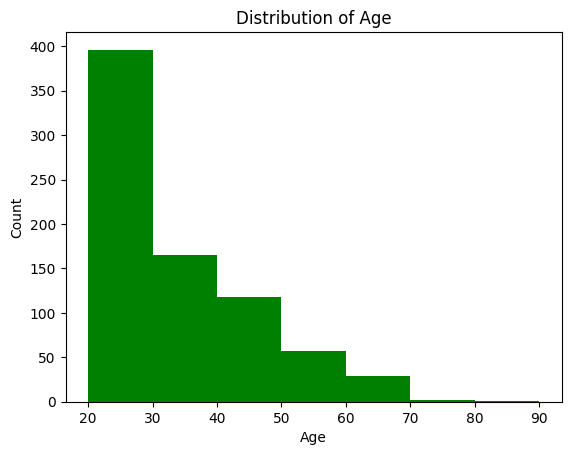

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(diabetes_dataset['Age'], bins=range(20, 100, 10), color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
stan_data = scaler.transform(X)

In [ ]:
print(stan_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
#X and Y for training
X = stan_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape)

(768, 8) (614, 8)


In [ ]:
print(X_test.shape)

(154, 8)


614 for Training and 154 for Testing

Now we train the model

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_predic = classifier.predict(X_train)
train_data_acc = accuracy_score(X_train_predic, Y_train)

In [ ]:
print('Accuracy of the Data after Training : ', train_data_acc)

Accuracy of the Data after Training :  0.7866449511400652


In [ ]:
X_test_predic = classifier.predict(X_test)
test_data_acc = accuracy_score(X_test_predic, Y_test)

In [ ]:
print('Accuracy of the Data after Testing : ', test_data_acc)

Accuracy of the Data after Testing :  0.7727272727272727


kneighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

scaler = StandardScaler()
stan_data = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Creating and training the model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

# Testing the model
Y_train_predic = classifier.predict(X_train)
train_data_acc = accuracy_score(Y_train_predic, Y_train)
Y_test_predic = classifier.predict(X_test)
test_data_acc = accuracy_score(Y_test_predic, Y_test)

# Printing the accuracy
print("Training Accuracy:", train_data_acc)
print("Testing Accuracy:", test_data_acc)

new_data = [[2, 90, 68, 42, 0, 38.2, 0.503, 27]]
new_data_std = scaler.transform(new_data)
prediction = classifier.predict(new_data_std)

if prediction[0] == 0:
    print('The person is NOT diabetic')
else:
    print('The person is diabetic')



Training Accuracy: 0.7980456026058632
Testing Accuracy: 0.7272727272727273
The person is NOT diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset and split into X and y
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train the logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_std, y_train)

# Predict on the train and test sets
y_train_pred = classifier.predict(X_train_std)
train_accuracy = accuracy_score(y_train_pred, y_train)

y_test_pred = classifier.predict(X_test_std)
test_accuracy = accuracy_score(y_test_pred, y_test)

print(f'Train accuracy: {train_accuracy:.3f}')
print(f'Test accuracy: {test_accuracy:.3f}')

# Predict on new data
new_data = [[2, 90, 68, 42, 0, 38.2, 0.503, 27]]
new_data_std = scaler.transform(new_data)
prediction = classifier.predict(new_data_std)

if prediction[0] == 0:
    print('The person is NOT diabetic')
else:
    print('The person is diabetic')

    


Train accuracy: 0.785
Test accuracy: 0.760
The person is NOT diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


guassianNB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# split the dataset into input features (X) and target variable (Y)
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

# create the Naive Bayes classifier and fit the model to the training data
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# make predictions on the training and testing data
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

# calculate the accuracy of the classifier
train_acc = accuracy_score(Y_train_pred, Y_train)
test_acc = accuracy_score(Y_test_pred, Y_test)

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

# make a prediction for new data
new_data = np.array([[2, 90, 68, 42, 0, 38.2, 0.503, 27]])
new_data = scaler.transform(new_data)
prediction = classifier.predict(new_data)

if prediction[0] == 0:
  print("The person is not diabetic.")
else:
  print("The person is diabetic.")

Training accuracy: 0.755700325732899
Testing accuracy: 0.7727272727272727
The person is not diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# split the dataset into input features (X) and target variable (Y)
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

# create the Random Forest classifier and fit the model to the training data
classifier = RandomForestClassifier(n_estimators=100, random_state=2)
classifier.fit(X_train, Y_train)

# make predictions on the training and testing data
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

# calculate the accuracy of the classifier
train_acc = accuracy_score(Y_train_pred, Y_train)
test_acc = accuracy_score(Y_test_pred, Y_test)

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

# make a prediction for new data
new_data = np.array([[2, 90, 68, 42, 0, 38.2, 0.503, 27]])
new_data = scaler.transform(new_data)
prediction = classifier.predict(new_data)

if prediction[0] == 0:
  print("The person is not diabetic.")
else:
  print("The person is diabetic.")


Training accuracy: 1.0
Testing accuracy: 0.7272727272727273
The person is diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction System

In [ ]:
# input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)
# input_data = (2, 120, 70, 30, 80, 25.5, 0.45, 35)
# input_data = (2, 90, 68, 42, 0, 38.2, 0.503, 27)
input_data = (2, 90, 68, 42, 0, 38.2, 0.503, 27)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The Person IS NOT DIABETIC")
else:
  print("The Person IS DIABETIC")
  y_test_pred = classifier.predict(X_test_std)
  test_accuracy = accuracy_score(y_test_pred, y_test)
  print(f'Test accuracy: {test_accuracy:.3f}')


[[-0.54791859 -0.02799627  0.04624525  0.59362962  0.0017411  -0.82403312
  -0.06606903  0.14967911]]
[0]
The Person IS NOT DIABETIC


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model.

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

Loading the Saved Model.

In [ ]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data = (0,112,40,35,148,43.1,2.288,33)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The Person IS NOT DIABETIC")
else:
  print("The Person IS DIABETIC")

[[-1.14185152 -0.27837344 -1.50468724  0.90726993  0.59217802  1.4097456
   5.4849091  -0.0204964 ]]
[1]
The Person IS DIABETIC


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
